In [313]:
import pandas as pd
import numpy as np
data = pd.read_csv('공공보건의료기관현황.csv', index_col=0, encoding='utf-8-sig')
print(data.columns)
data.head()

Index(['병원 명', '설립형태', '근거 법령', '관계 행정기관', '관계 공공단체', '심평원 요양기관번호', '종별구분',
       '병상수', '소재지 우편번호', '주소', '홈페이지', '대표전화', 'FAX', '비고'],
      dtype='object')


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [314]:
data['주소'].head()

연번
1        강원도 춘천시 충열로 142번길 24-16
2               강원도 삼척시 오십천로 418
3            강원도 영월군 영월읍 중앙1로 59
4          강원도 원주시 서원대로 387(개운동)
5    강원도 강릉시 경강로 2007(남문동 164-1)
Name: 주소, dtype: object

In [315]:
addr = pd.DataFrame(data['주소'])
# addr['주소'] 를 쪼갠 뒤, 두 개의 원소를 반환했다
addr = addr['주소'].apply(lambda v : v.split()[:2]) # 시도, 군구 분리(공백기준)
#addr.to_list()
# addr을 리스트로 바꾸고, 컬럼명 2개를 지정
addr = pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [316]:
print(addr['시도'].unique())

['강원도' '경기도' '경기' '경남' '창원시' '경상남도' '경상북도' '경산시' '경북' '인천광역시' '대구광역시'
 '전라남도' '대전광역시' '광주광역시' '제주특별자치도' '부산광역시' '전라북도' '충북' '서울특별시' '서울시'
 '부산특별시' '대전시' '충남' '전남' '충청남도' '울산광역시' '전북' '천안시' '충청북도']


In [317]:
# 창원시 주소 데이터 변경
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [318]:
# 표준 행정 구역 이름으로 수정 : '창원시' -> '경상남도 창원시'
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [319]:
# 변경된 내용 확인
print(addr.iloc[27])
print(addr.iloc[31])

시도    경상남도
군구     창원시
Name: 27, dtype: object
시도    경상남도
군구     창원시
Name: 31, dtype: object


In [320]:
# 동일하게 '경산시','천안시' 주소 데이터 변경
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [321]:
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [322]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [323]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [324]:
# 시도 변경 내용 확인
print(addr['시도'].unique())

['강원도' '경기도' '경기' '경남' '경상남도' '경상북도' '경북' '인천광역시' '대구광역시' '전라남도' '대전광역시'
 '광주광역시' '제주특별자치도' '부산광역시' '전라북도' '충북' '서울특별시' '서울시' '부산특별시' '대전시' '충남'
 '전남' '충청남도' '울산광역시' '전북' '충청북도']


In [325]:
## 표준 행정구역 이름으로 수정 : 경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도',
'서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도',
'전남':'전라남도', '전북':'전라북도'}
# dict.get(key[,default])
# - key에 해당하는 값이 없으면 default값(key)을 리턴
addr['시도']= addr['시도'].apply(lambda v: addr_aliases.get(v, v))


# 딕셔너리 get(key) 함수
# 딕셔너리의 key에 해당하는 값(value)를 리턴
# dict.get(key, default) <- key에 해당하는 값이 없으면 default값을 리턴

In [326]:
print(addr['시도'].unique())

['강원도' '경기도' '경상남도' '경상북도' '인천광역시' '대구광역시' '전라남도' '대전광역시' '광주광역시'
 '제주특별자치도' '부산광역시' '전라북도' '충청북도' '서울특별시' '충청남도' '울산광역시']


In [327]:
print(addr['군구'].unique()) # 아란13길이 눈에 띈다

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '아란13길' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '제주시' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군'
 '단양군']


In [328]:
addr[addr['군구'] == '아란13길'] # 인덱스 알아오기

,시도,군구
75,제주특별자치도,아란13길


In [329]:
addr.iloc[75] = ['제주특별자치도', '제주시'] # 아란 13길이 제주시에 있는 걸 파악한 뒤, 값 변경
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [330]:
print(addr['군구'].unique())

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '제주시' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군' '단양군']


In [331]:
#'시도'와 '군구' 컬럼을 합친 새로운 컬럼 '시도군구' 추가
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [332]:
# 의료기관수 컬럼 추가
addr['의료기관수'] = 0
addr.head()

,시도,군구,시도군구,의료기관수
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [333]:
# '시도','군구','시도군구'를 기준으로 그룹 생성 후 그룹별 의료 기관수 합계 구하기
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())
addr_group.head()
#as_index : 그룹화할 내용을 인덱스로 사용할지 여부
# False 기존 인덱스가 유지됨

,시도,군구,시도군구,의료기관수
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [334]:
# 행정구역별 공공보건의료기관의 수 구하기
# '시도군구' 컬럼을 데이터 프레임 병합에 사용할 인덱스로 설정
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,의료기관수
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [335]:
# 행정구역별 인구수 데이터 준비
population = pd.read_excel('행정구역시도별성별인구수.xlsx', header=[0])

population.head()

,행정구역(시도)별1,행정구역(시군구)별2,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [336]:
def change(sr) :
    if sr == "강원특별자치도" :
        return "강원도"
    else :
        return sr

population["행정구역(시도)별1"]=population["행정구역(시도)별1"].apply(change)

In [337]:
# 컬럼 이름 변경
population = population.rename(columns = {'행정구역(시도)별1': '시도',
'행정구역(시군구)별2': '군구'})

population.head()

,시도,군구,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [338]:
#'군구'컬럼에서 공백 제거, '시도'와 '군구' 연결하여 '시도군구'컬럼 추가
row_count = population.shape[0] # row의 개수
for index in range(0, row_count):
    population['군구'][index] = population['군구'][index].strip()

C:\Users\mathn\AppData\Local\Temp\ipykernel_34720\2812930786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][index] = population['군구'][index].strip()
C:\Users\mathn\AppData\Local\Temp\ipykernel_34720\2812930786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][index] = population['군구'][index].strip()
C:\Users\mathn\AppData\Local\Temp\ipykernel_34720\2812930786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [339]:
# 시도와 군구를 연결하여 시도군구 컬럼 추가
population['시도군구']= population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)
population.head()

,시도,군구,총인구수 (명),시도군구
0,전국,소계,51325329,전국 소계
1,서울특별시,소계,9386034,서울특별시 소계
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구


In [340]:
# 군구 컬럼에서 소계 항목 제거
population = population[population.군구 != '소계'] # 특정 컬럼 접근 방법 1
#population = population[population['군구'] != '소계'] # 접근 방법 2
population.head()

,시도,군구,총인구수 (명),시도군구
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구
5,서울특별시,성동구,277361,서울특별시 성동구
6,서울특별시,광진구,335554,서울특별시 광진구


In [341]:
# 시도 군구 컬럼을 병합에 사용할 인덱스로 설정
population = population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명)
시도군구,,,
서울특별시 종로구,서울특별시,종로구,139417
서울특별시 중구,서울특별시,중구,121312
서울특별시 용산구,서울특별시,용산구,213151
서울특별시 성동구,서울특별시,성동구,277361
서울특별시 광진구,서울특별시,광진구,335554


In [342]:
# 데이터 병합
# 내부 조인(inner join) : 둘 이상의 데이터프레임에서 조건에 맞는 행을 연결
# 외부 조인(outer join) : 한쪽 데이터프레임에만 존재하는 데이터를 다른 데이터프레임에 결합
#DataFrame.merge(left, right, how='inner', left_on=None, right_on=None,left_index=True, right_index=True)
# left_on, right_on : 왼쪽, 오른쪽 데이터프레임에서 값이 일치해야 할 항목
# left_index=True, right_index=True : 인덱스를 기준으로 병합

In [343]:
#의료기관 데이터와 행정구역별 인구수 데이터 병합 : addr_population_merge생성
addr_population_merge = pd.merge(addr_group, population, how='inner',
left_index=True, right_index=True)
addr_population_merge.head()

,시도_x,군구_x,의료기관수,시도_y,군구_y,총인구수 (명)
시도군구,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,209439
강원도 동해시,강원도,동해시,1,강원도,동해시,88625
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,62651
강원도 속초시,강원도,속초시,1,강원도,속초시,82054
강원도 양구군,강원도,양구군,1,강원도,양구군,21056


In [344]:
# 필요한 컬럼만 추출 #
local_medicalcenter_population = addr_population_merge[['시도_x', '군구_x', '의료기관수','총인구수 (명)']]

# 컬럼 이름 변경
local_medicalcenter_population = \
local_medicalcenter_population.rename(columns = {'시도_x': '시도', '군구_x': '군구','의료기관수': '공공의료기관수', '총인구수 (명)': '인구수' })

local_medicalcenter_population.head(3)

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,209439
강원도 동해시,강원도,동해시,1,88625
강원도 삼척시,강원도,삼척시,1,62651


In [345]:
local_medicalcenter_population.loc["강원도 강릉시"]

시도            강원도
군구            강릉시
공공의료기관수         4
인구수        209439
Name: 강원도 강릉시, dtype: object

In [346]:
# 인구대비 공공의료기관 비율 계산 및 컬럼 추가
# 10만명 당 의료기관 비율 계산
# 새로운 컬럼 '인구대비의료기관비율'에 10만명단 의료기관 비율값 추가
mc_count = local_medicalcenter_population['공공의료기관수']
local_medicalcenter_population['인구대비의료기관비율'] = \
mc_count.div(local_medicalcenter_population['인구수'], axis=0)*100000
local_medicalcenter_population.head()

,시도,군구,공공의료기관수,인구수,인구대비의료기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,209439,1.909864
강원도 동해시,강원도,동해시,1,88625,1.128350
강원도 삼척시,강원도,삼척시,1,62651,1.596144
강원도 속초시,강원도,속초시,1,82054,1.218710
강원도 양구군,강원도,양구군,1,21056,4.749240


<Axes: xlabel='시도군구'>

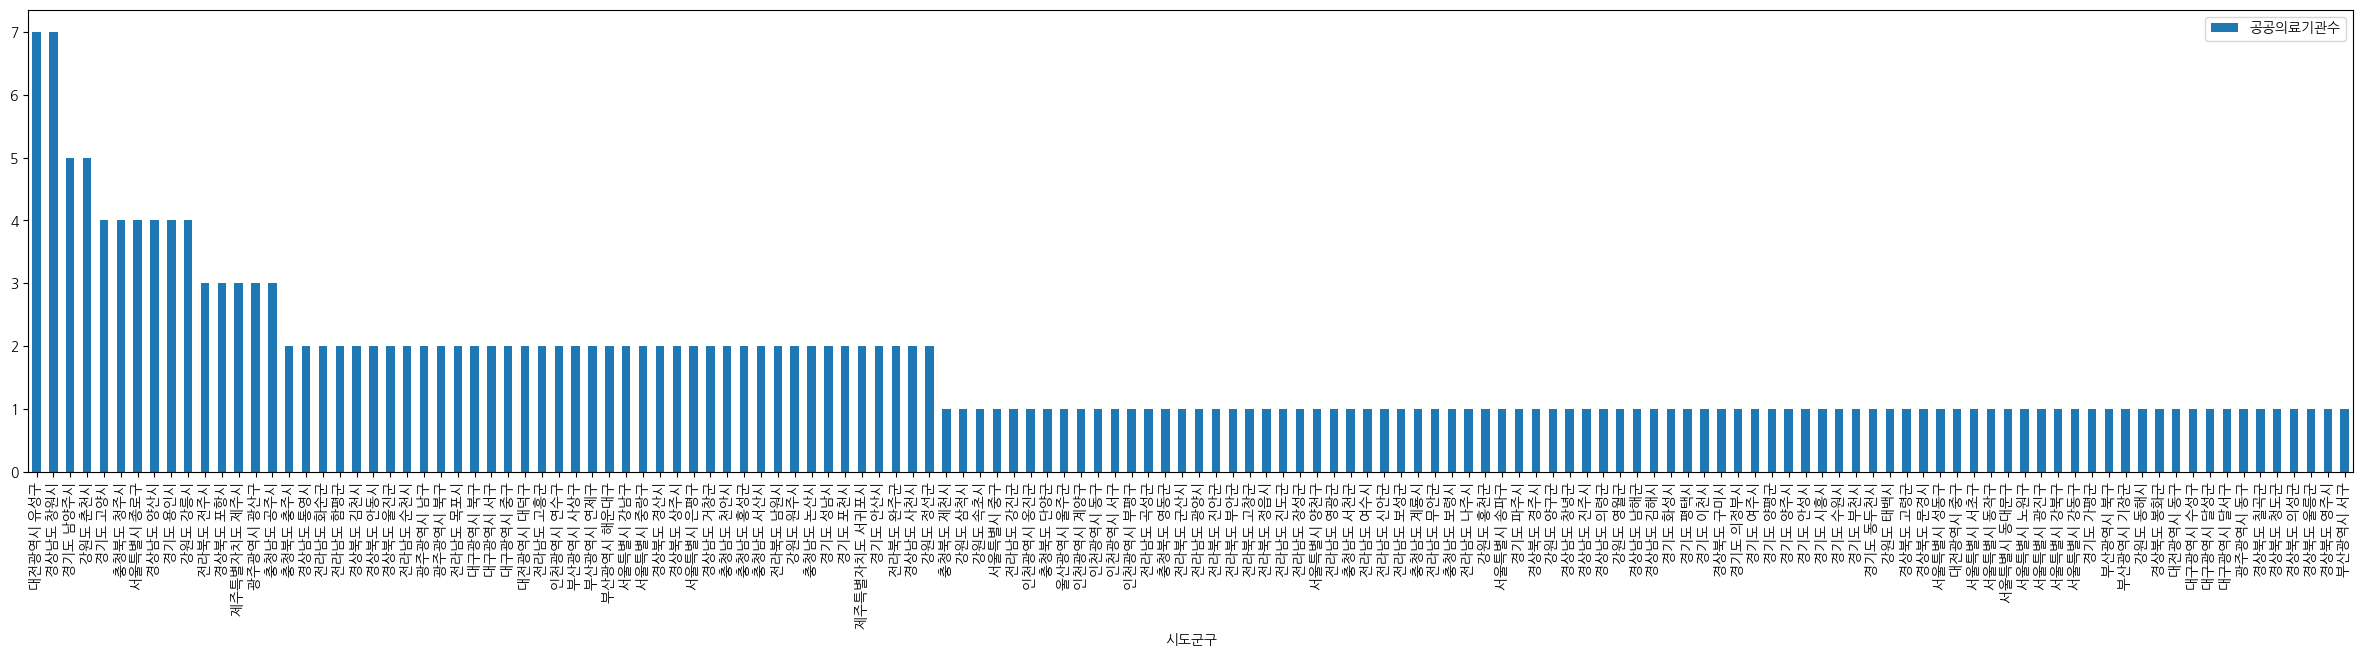

In [347]:
# 지역별 공공의료기관수 현황
import matplotlib.pyplot as plt
import platform
import koreanize_matplotlib
mc_ratio = local_medicalcenter_population[['공공의료기관수']]
mc_ratio = mc_ratio.sort_values(by='공공의료기관수', ascending=False)
mc_ratio.plot(kind='bar', rot=90, figsize=(30, 6))

<Axes: xlabel='시도군구'>

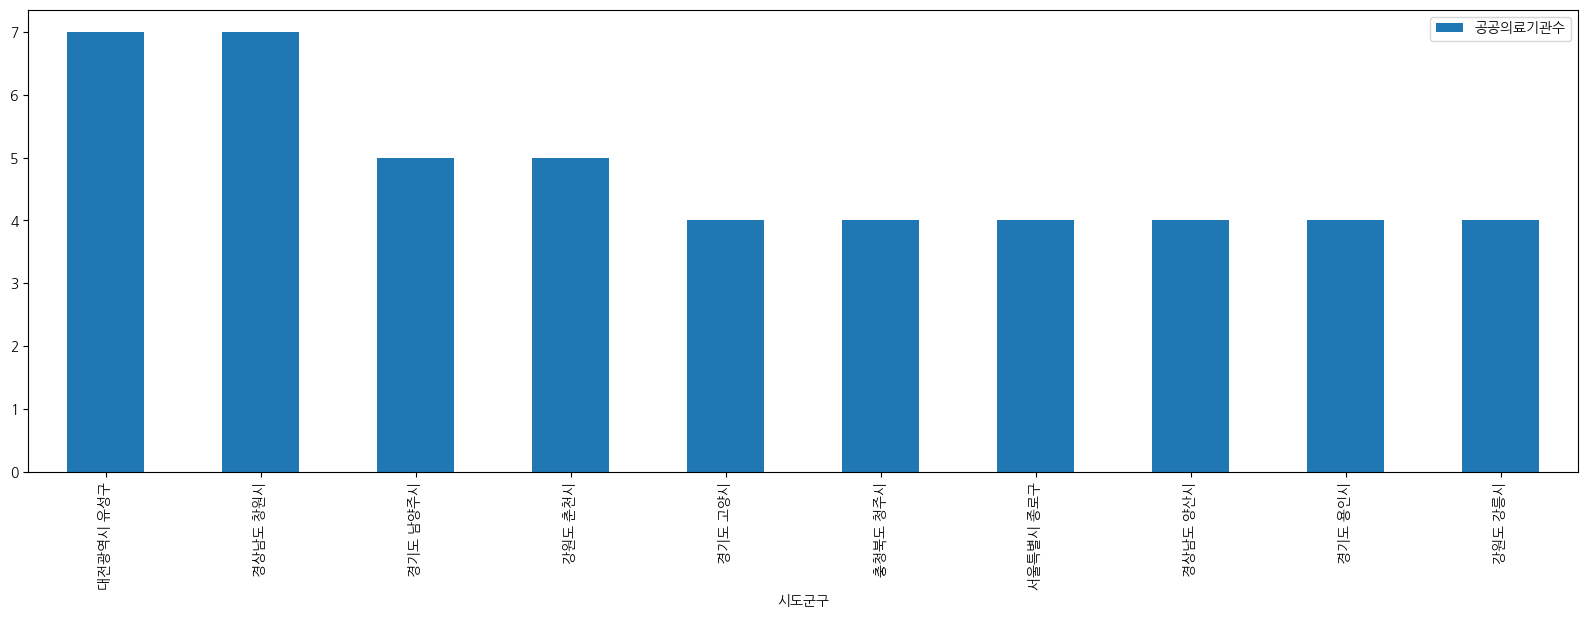

In [348]:
# 공공의료 기관수가 많은 상위 10개 시도 출력
mc_ratio = mc_ratio.sort_values('공공의료기관수', ascending=False)
mc_ratio[:10].plot(kind='bar', rot=90, figsize=(20, 6))

<Axes: xlabel='시도군구'>

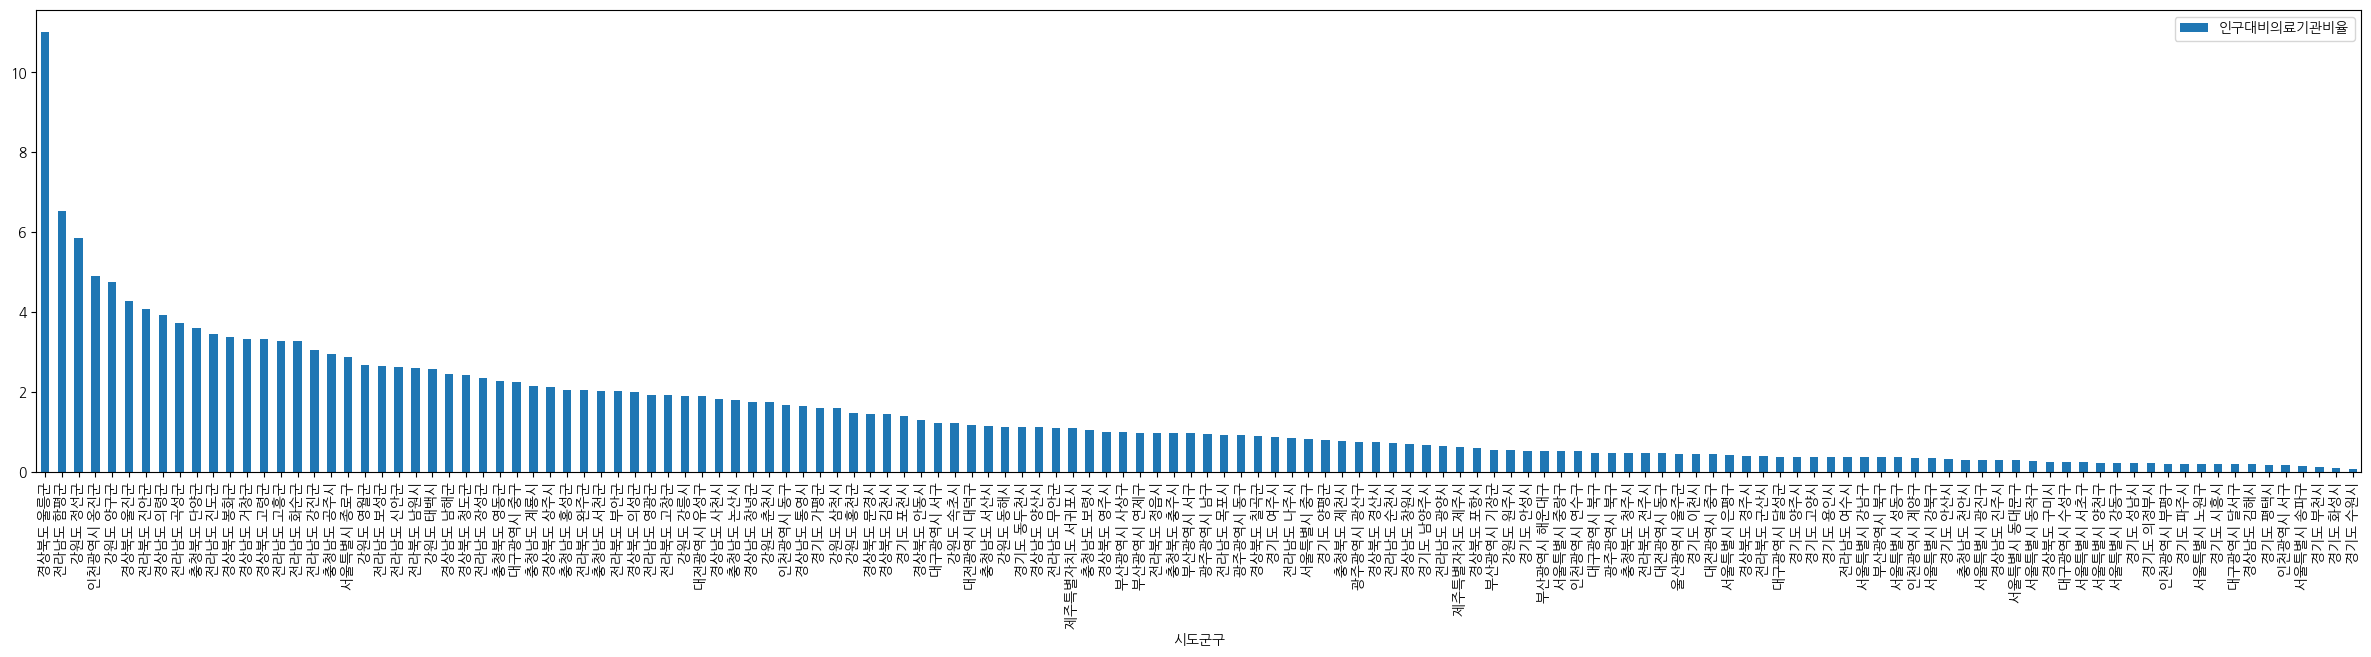

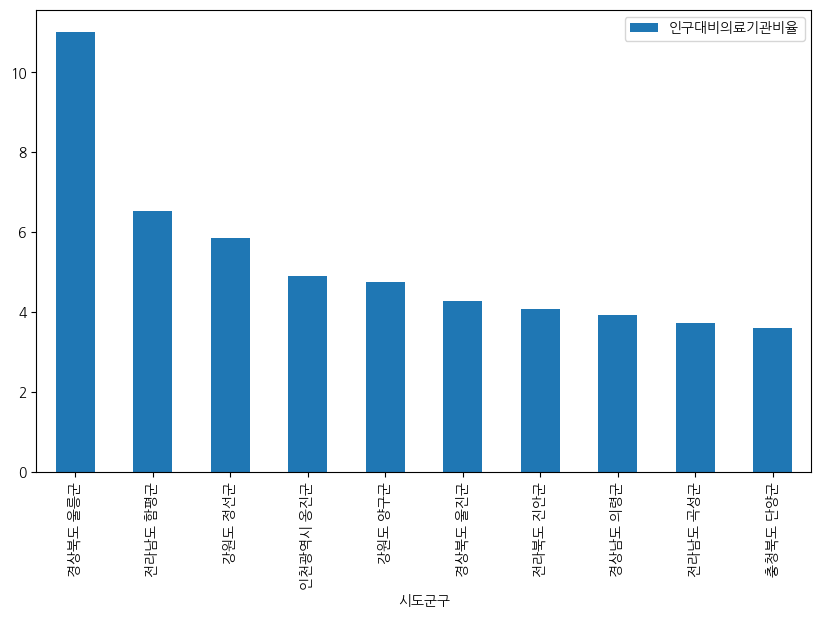

In [349]:
# 인구대비 공공의료기관 비율
population_mc_rate = local_medicalcenter_population[['인구대비의료기관비율']]
population_mc_rate = population_mc_rate.sort_values('인구대비의료기관비율', ascending = False)
population_mc_rate.plot(kind='bar', rot=90, figsize=(30, 6))
population_mc_rate[:10].plot(kind='bar', rot=90, figsize=(10, 6))